<h1>Lab 10</h1>
<h4>Name : Ambalia Harshit</h4>
<h4>Roll No. : MT001</h4>

<h3>AIM : Clustering Algorithms </h3>

# **Assignment 01 :**

1. Apply Elbow Method on given Country-data.csv file.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [88]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Country-data.csv')
df = df.drop(0, axis=0)
df.reset_index(drop=True, inplace=True)
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
1,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
2,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
3,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
4,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300


In [5]:
df = df.drop(columns=['country'])
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0
1,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
2,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0
3,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0
4,14.5,18.9,8.10,16.0,18700.0,20.90,75.8,2.37,10300.0
...,...,...,...,...,...,...,...,...,...
161,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970.0
162,17.1,28.5,4.91,17.6,16500.0,45.90,75.4,2.47,13500.0
163,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310.0
164,56.3,30.0,5.18,34.4,4480.0,23.60,67.5,4.67,1310.0


In [6]:
import numpy as np
def handle_missing_column_using_average(df, column_name):
    df[column_name] = df[column_name].replace(to_replace='.*\?.*', value=np.nan, regex=True)
    missing_indices = df[df[column_name].isnull()].index
    non_missing_indices = df[df[column_name].notnull()].index

    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    df[column_name] = df[column_name].astype(float)

    if len(missing_indices) < len(non_missing_indices):
        column_mean = df.loc[non_missing_indices, column_name].mean()
        df[column_name] = df[column_name].fillna(column_mean)
    else:
        print('Dropping the column')
        df = df.drop(columns=[column_name])
    return df

In [7]:
handle_missing_from = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
for column_name in handle_missing_from:
    df = handle_missing_column_using_average(df, column_name)

In [55]:
from sklearn.cluster import KMeans

best_model = None
best_model_cluster_number = None
min_inertia = float('inf')
# Higher the value of k, number of clusters will increase, Higher the accuracy will get
max_clusters = 50 # if 166, error will be zero as all points will be considered saperate cluster.
sse={}

for n_cluster in range(1, max_clusters + 1):
    model = KMeans(n_clusters=n_cluster).fit(df)
    sse[n_cluster] = model.inertia_
    print('Model with Sum of Square Error : ' + str(model.inertia_) + ' & cluster number : ' + str(n_cluster))
    if model.inertia_ < min_inertia:
        min_inertia = model.inertia_
        best_model = model
        best_model_cluster_number = n_cluster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model with Sum of Square Error : 117061938516.57443 & cluster number : 1
Model with Sum of Square Error : 36440852026.89325 & cluster number : 2
Model with Sum of Square Error : 21646179844.34039 & cluster number : 3
Model with Sum of Square Error : 14736340451.330278 & cluster number : 4
Model with Sum of Square Error : 10647046527.863686 & cluster number : 5
Model with Sum of Square Error : 7928973319.885546 & cluster number : 6
Model with Sum of Square Error : 5344327921.099324 & cluster number : 7
Model with Sum of Square Error : 4249457657.1185846 & cluster number : 8


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model with Sum of Square Error : 3237152521.4096727 & cluster number : 9
Model with Sum of Square Error : 2641688496.3315215 & cluster number : 10
Model with Sum of Square Error : 2222862179.047017 & cluster number : 11


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model with Sum of Square Error : 1818999659.9560552 & cluster number : 12
Model with Sum of Square Error : 1546234484.7630622 & cluster number : 13


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model with Sum of Square Error : 1252602239.3656423 & cluster number : 14
Model with Sum of Square Error : 1166839213.6131258 & cluster number : 15
Model with Sum of Square Error : 1014412893.2163825 & cluster number : 16


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model with Sum of Square Error : 936896855.0462991 & cluster number : 17
Model with Sum of Square Error : 859735989.4488171 & cluster number : 18
Model with Sum of Square Error : 734408070.9925132 & cluster number : 19


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model with Sum of Square Error : 703617658.9028232 & cluster number : 20
Model with Sum of Square Error : 617100093.8432184 & cluster number : 21


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model with Sum of Square Error : 594214205.3916881 & cluster number : 22
Model with Sum of Square Error : 530380213.99582994 & cluster number : 23
Model with Sum of Square Error : 468929456.3844391 & cluster number : 24


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model with Sum of Square Error : 442620118.1648063 & cluster number : 25
Model with Sum of Square Error : 423241373.2993157 & cluster number : 26
Model with Sum of Square Error : 369020915.62342036 & cluster number : 27


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model with Sum of Square Error : 361494199.83360225 & cluster number : 28
Model with Sum of Square Error : 318078278.4206431 & cluster number : 29


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model with Sum of Square Error : 321718169.72985566 & cluster number : 30
Model with Sum of Square Error : 278282882.93686676 & cluster number : 31


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model with Sum of Square Error : 274326664.1460437 & cluster number : 32


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model with Sum of Square Error : 250492546.5311945 & cluster number : 33
Model with Sum of Square Error : 237915393.44687182 & cluster number : 34


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model with Sum of Square Error : 223145422.61543846 & cluster number : 35


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model with Sum of Square Error : 202078839.1125912 & cluster number : 36
Model with Sum of Square Error : 196252395.19339383 & cluster number : 37


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model with Sum of Square Error : 190060914.43354598 & cluster number : 38
Model with Sum of Square Error : 177155665.6032349 & cluster number : 39
Model with Sum of Square Error : 160535758.61406305 & cluster number : 40


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model with Sum of Square Error : 150583243.71598968 & cluster number : 41
Model with Sum of Square Error : 141938866.9276432 & cluster number : 42


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model with Sum of Square Error : 140227302.03188524 & cluster number : 43
Model with Sum of Square Error : 129966719.72689968 & cluster number : 44


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model with Sum of Square Error : 120048439.9960911 & cluster number : 45
Model with Sum of Square Error : 109983241.42280658 & cluster number : 46


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model with Sum of Square Error : 99977270.54218063 & cluster number : 47
Model with Sum of Square Error : 96823266.29802021 & cluster number : 48


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model with Sum of Square Error : 95844783.22138634 & cluster number : 49
Model with Sum of Square Error : 83092340.08450551 & cluster number : 50


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [56]:
print('Best model with Sum of Square Error : ' + str(best_model.inertia_) + ' & cluster number : ' + str(n_cluster))

Best model with Sum of Square Error : 83092340.08450551 & cluster number : 50


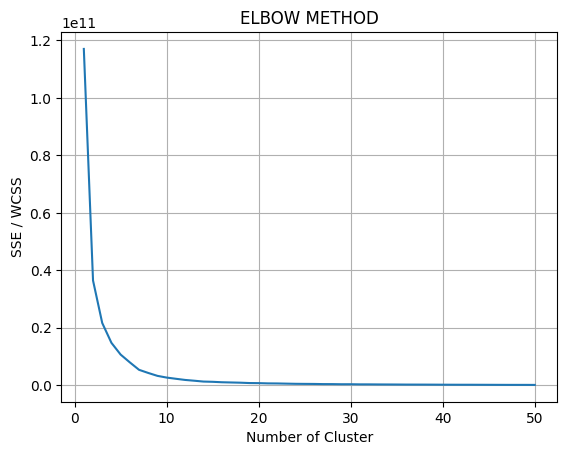

In [57]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(list(sse.keys()),list(sse.values()))
plt.xlabel("Number of Cluster")
plt.ylabel("SSE / WCSS")
plt.title("ELBOW METHOD")
plt.grid(True)
plt.show()

#**Assignment 02 :**

1. Study and explain with an example the working of Silhouette Score to determine the optimal number of clusters.
2. Apply Kmeans clustering on the load_digits dataset and measure its accuracy.

In [63]:
from sklearn.datasets import load_digits
digits = load_digits()
data = digits.data
print(data.shape[0])
print(data.shape[1])

1797
64


In [70]:
df = pd.DataFrame(data, columns=[f'Pixel_{i}' for i in range(data.shape[1])])

In [77]:
from sklearn.metrics import silhouette_score

cluster_range = range(2, 50)
silhouette_scores = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(df, labels)
    silhouette_scores.append(silhouette_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [78]:
optimal_clusters = cluster_range[np.argmax(silhouette_scores)]
print('Optimal number of clusters : ' + str(optimal_clusters))

Optimal number of clusters : 9


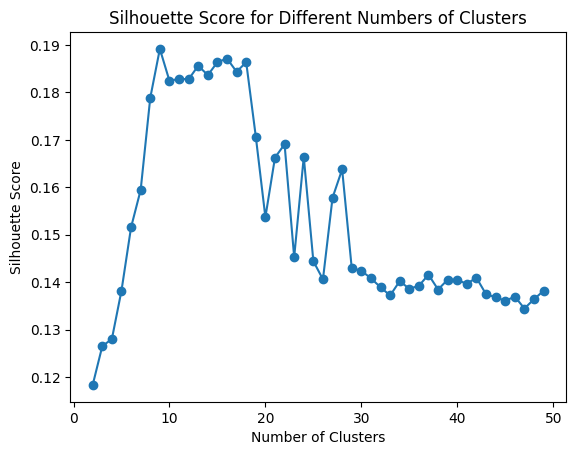

In [79]:
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()

In [81]:
model = KMeans(n_clusters=optimal_clusters).fit(df)
print('Model with Sum of Square Error : ' + str(model.inertia_) + ' & cluster number : ' + str(optimal_clusters))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Model with Sum of Square Error : 1202293.9849317393 & cluster number : 9


# **Assignment 03 :**

1. Apply DBSCAN to Country-data.csv and change the value of the hyperparameter value and note down your results.

In [89]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Country-data.csv')
df = df.drop(0, axis=0)
df.reset_index(drop=True, inplace=True)
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
1,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
2,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
3,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300
4,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220


In [90]:
df = df.drop(columns=['country'])
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
1,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
2,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
3,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300
4,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220
...,...,...,...,...,...,...,...,...,...
160,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
161,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
162,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
163,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


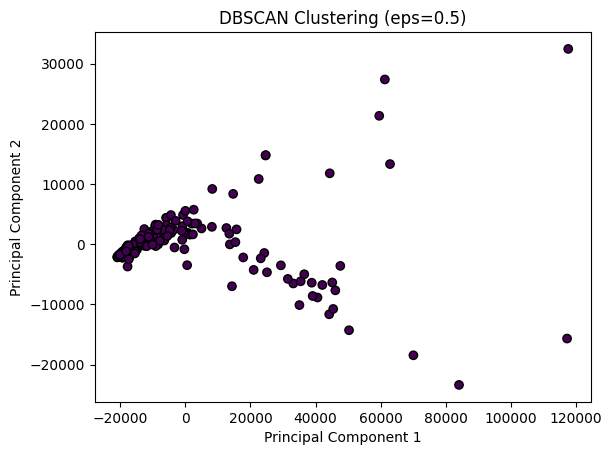

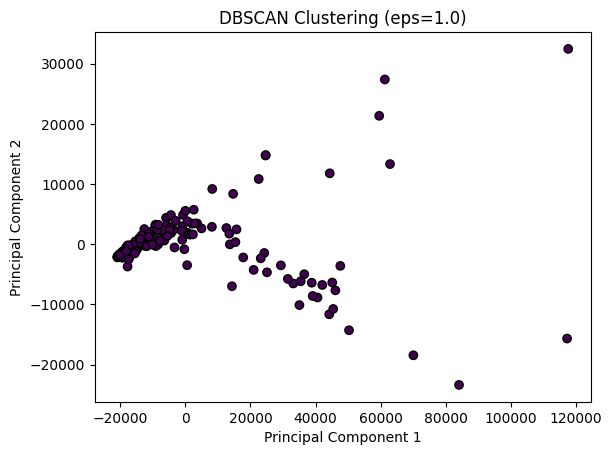

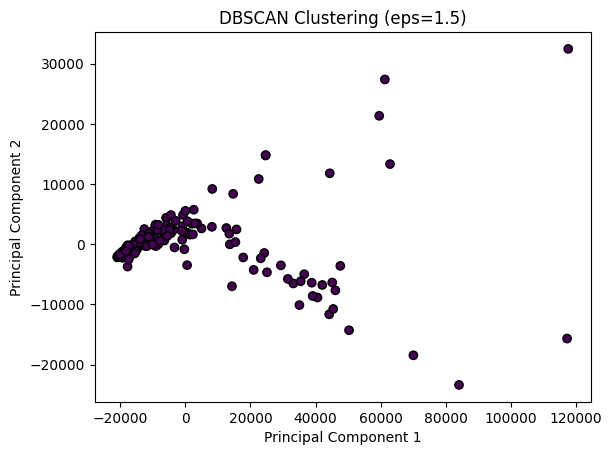

In [113]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

eps_values = [0.5, 1.0, 1.5]
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan_labels = dbscan.fit_predict(df)

    # Visualize the clusters using PCA
    pca = PCA(n_components=2)
    features_pca = pca.fit_transform(df)

    plt.scatter(features_pca[:, 0], features_pca[:, 1], c=dbscan_labels, cmap='viridis', edgecolors='k')
    plt.title(f'DBSCAN Clustering (eps={eps})')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

In [114]:
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()

# Create a list of the variables that you need to scale
varlist = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
# Scale these variables using 'fit_transform'
data[varlist] = scaler.fit_transform(data[varlist])

In [117]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline

clustering = AgglomerativeClustering(affinity='euclidean',
                        linkage='single', memory=None, n_clusters=3).fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


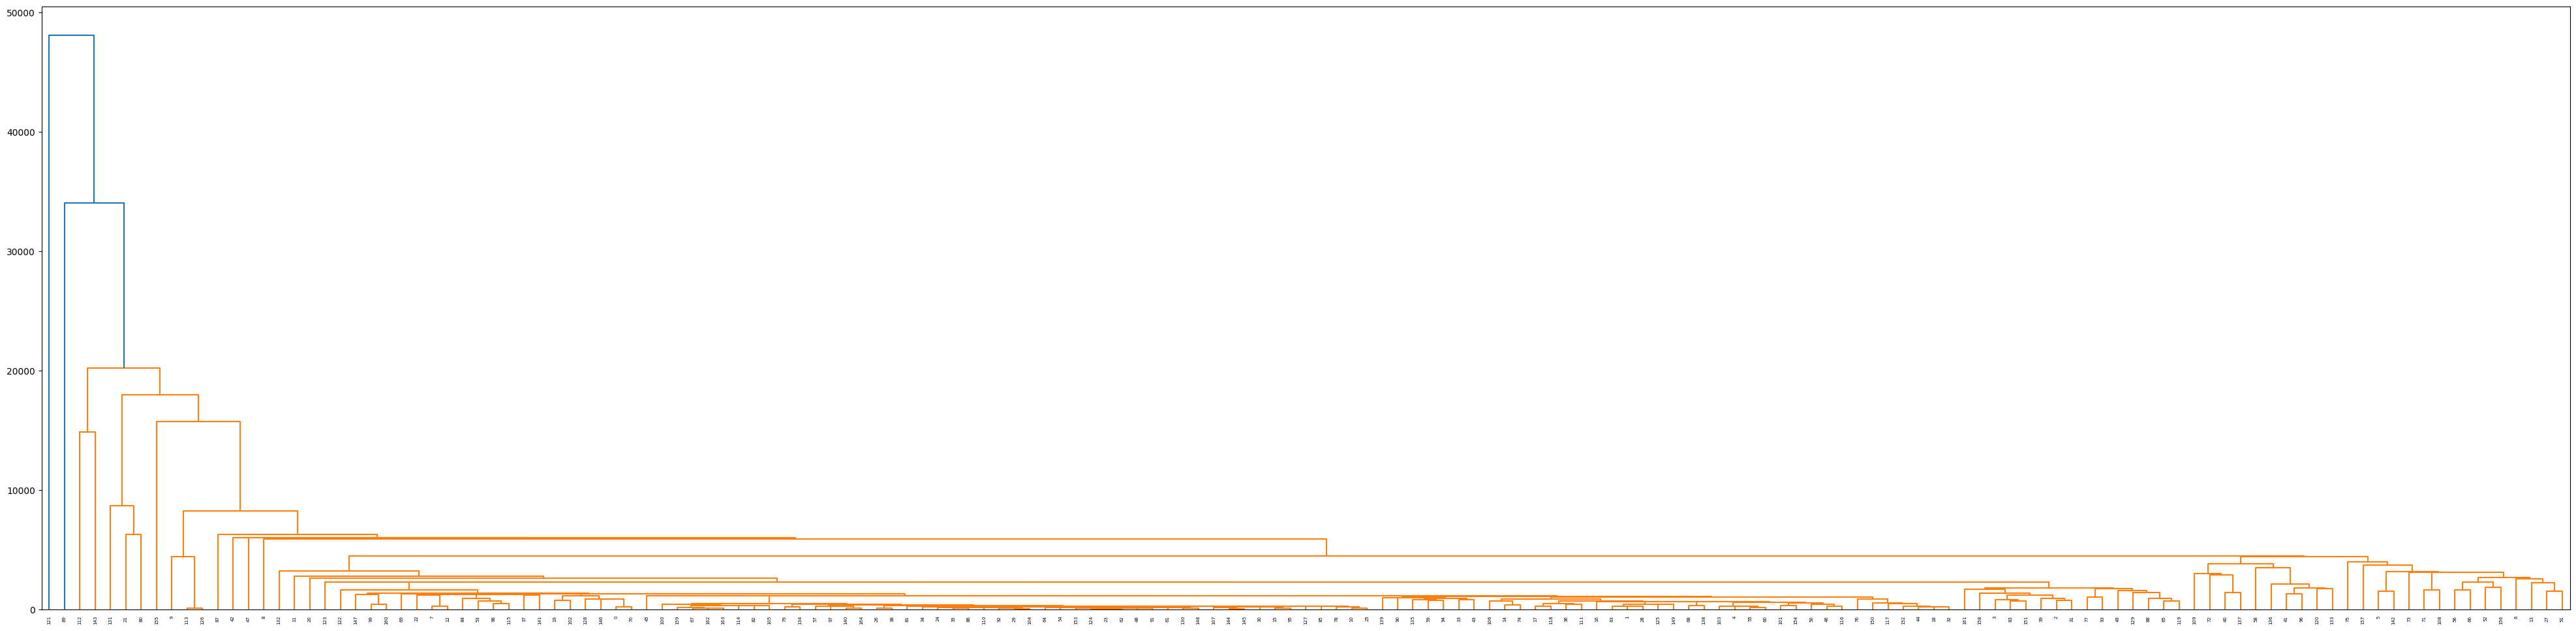

In [119]:
import scipy.cluster.hierarchy as hcluster

plt.figure(figsize=(50, 12))
dend=hcluster.dendrogram(hcluster.linkage(df,method='single'))